# Nueva sección

## Carga de los datos

In [2]:
import cv2
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
import glob

In [3]:



# Primero, bajamos los datos de entrenamiento
keras.utils.get_file(fname="simpsons_train.tar.gz",
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60")



# Hacemos lo mismo con los datos de test
keras.utils.get_file(fname="simpsons_test.tar.gz",
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8")


'C:\\Users\\NestorBD\\.keras\\datasets\\simpsons_test.tar.gz'

In [4]:
# Descomprimimos el archivo
!tar -xzf C:/Users/NestorBD/.keras/datasets/simpsons_train.tar.gz -C C:/Users/NestorBD/.keras/datasets
!tar -xzf C:/Users/NestorBD/.keras/datasets/simpsons_test.tar.gz -C C:/Users/NestorBD/.keras/datasets

In [5]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Utilizamos sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Vamos a standarizar todas las imágenes a tamaño 64x64
IMG_SIZE = 64

In [6]:
def load_train_set(dirname, map_characters, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

In [7]:
def load_test_set(dirname, map_characters, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('\\')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)


In [8]:
# Cargamos los datos. Si no estás trabajando en colab, cambia los paths por
# los de los ficheros donde hayas descargado los datos.
DATASET_TRAIN_PATH_COLAB = "C:/Users/NestorBD/.keras/datasets/simpsons"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob


In [9]:
DATASET_TEST_PATH_COLAB = "C:/Users/NestorBD/.keras/datasets/simpsons_testset"
X_t, y_t = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leídas 890 imágenes de test


In [10]:
# Vamos a barajar aleatoriamente los datos. Esto es importante ya que si no
# lo hacemos y, por ejemplo, cogemos el 20% de los datos finales como validation
# set, estaremos utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

## Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que nuestro modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting. Una posible partición puede ser 80 / 20.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como hemos hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

**Normalización de las imágenes.**

In [11]:
# Preprocessing normalización de las imágenes
# X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
# X_t, y_t = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)
X = X / 255.0
X_t = X_t / 255.0

**Análisis de los datos a utilizar.**

In [12]:
def visualize_example(x):
  plt.figure()
  plt.imshow(x)
  plt.colorbar()
  plt.grid(False)
  plt.show()

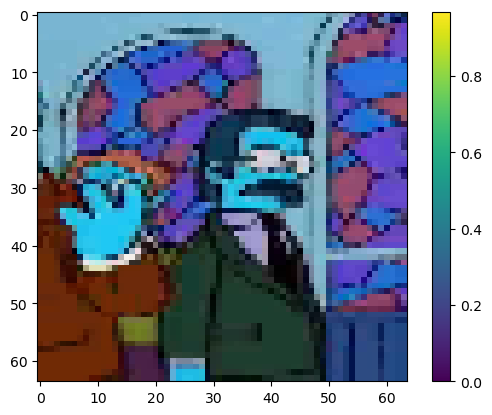

ned_flanders
(64, 64, 3)


In [13]:
visualize_example(X[70]) # Visualiza la imagen normalizada con valores de 0 a 1
print(MAP_CHARACTERS[y[70]]) # Acceso al diccionario
print(X[70].shape[0:3]) # Dimensiones de la imagen tras resize con los 3 canales RGB

In [14]:
#batch_size=128
num_classes=18
epochs=5
img_rows,img_cols=IMG_SIZE,IMG_SIZE
input_shape=(img_rows,img_cols,3) #(64,64,3)

In [15]:
# convert class vectors to binary class matrices
y=keras.utils.to_categorical(y,num_classes)
y_t=keras.utils.to_categorical(y_t,num_classes)

In [16]:
X.shape

(18992, 64, 64, 3)

In [17]:
y.shape

(18992, 18)

**Parámetros por defecto de la capa de convolución:** <br>
*keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)*

In [21]:
model = keras.Sequential([
  keras.layers.Conv2D(32, kernel_size=(3, 3), data_format="channels_last",input_shape=(64, 64, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(500, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(18, activation='softmax')
  ])

In [19]:
model.summary()
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 512)       590336    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 512)         0

*Observamos que el modelo tiene cerca de 3 millones de parámetros, se ha visto una mejora importante al añadir más neuronas en la capa dense_9, otros modelos probados con 200 neuronas solo alcanzaban un 65% de precisión. Hacemos dos máxpooling seguidos para reducir de 600000 a 4600 las neuronas en la capa flatten_5 y que no se dispare el número de parámetros pudiendo así aumentar el número de neuronas de la capa dense_9 que hemos observado mejora la precisión. Se usó categorical crossentropy porque las variables dependientes se transformaron en categorías y se usa la función de activation softmax en la capa de salida.*

**Comparación de modelos CNNs con un modelo de Fully Connected para este problema.**<br>
*El número de neuronas en la capa de entrada hace inviable entrenar un modelo Fully Connected que no usa capas convolucionales. Los filtros convolucionales permiten extraer características espaciales de las imágenes, frente a un modelo Fully Connected en el que no se aprovecha esta posibilidad.*


**Entrenamiento completo del mejor modelo.** <br>
*División de los datos en training/validation 80/20 para tener una buena estimación de los valores que nuestro modelo tendrá
en los datos de test, así como comprobar que no estamos cayendo en overfitting.*

In [20]:
history=model.fit(X, y, epochs=7, validation_split = 0.2)

Epoch 1/7
 76/475 [===>..........................] - ETA: 1:18 - loss: 2.7702 - accuracy: 0.1456

KeyboardInterrupt: 

**Análisis visual de los errores de la red.**

In [ ]:
def plot_acc(history, title="Model Accuracy"):
  """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
def plot_loss(history, title="Model Loss"):
  """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

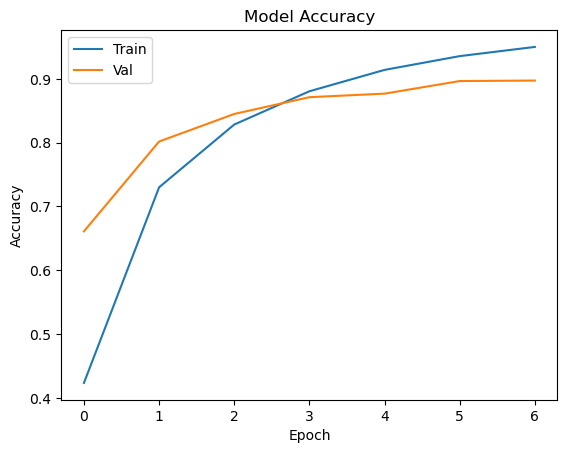

In [ ]:
plot_acc(history)

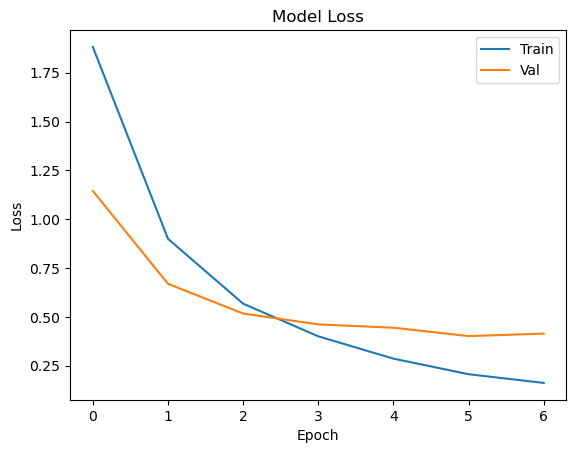

In [ ]:
plot_loss(history)

*Viendo las gráficas observamos que con 5 épocas las líneas de loss y accuracy se vuelven prácticamente horizontales, por eso no seguimos entrenando.*

**Evaluación de los datos de test con este modelo.**

In [ ]:
print(X_t)
print(y_t)
model.evaluate(X_t, y_t, batch_size=32, verbose=1)

[[[[0.6        0.34901961 0.42352941]
   [0.55686275 0.36078431 0.42352941]
   [0.42745098 0.31764706 0.36862745]
   ...
   [0.61568627 0.39215686 0.42745098]
   [0.61568627 0.39215686 0.42745098]
   [0.61568627 0.39215686 0.42745098]]

  [[0.63137255 0.36470588 0.43137255]
   [0.59607843 0.38431373 0.44313725]
   [0.42745098 0.30980392 0.34901961]
   ...
   [0.61568627 0.39215686 0.42745098]
   [0.61568627 0.39215686 0.42745098]
   [0.61568627 0.39215686 0.42745098]]

  [[0.59215686 0.38039216 0.43137255]
   [0.51372549 0.36862745 0.40392157]
   [0.36078431 0.30196078 0.3254902 ]
   ...
   [0.60392157 0.39215686 0.42745098]
   [0.60392157 0.39215686 0.42745098]
   [0.60392157 0.39215686 0.42745098]]

  ...

  [[0.38039216 0.30980392 0.42745098]
   [0.41568627 0.3372549  0.45098039]
   [0.40784314 0.32941176 0.44313725]
   ...
   [0.56470588 0.56078431 0.75686275]
   [0.57254902 0.56078431 0.75686275]
   [0.57254902 0.55294118 0.76470588]]

  [[0.28627451 0.42352941 0.55686275]
   [0.4

[0.10940886288881302, 0.9730337262153625]

*Observamos que sobre los datos de test el loss es 0.10 y la precisión de un 97%*

**Almacenamos todas las predicciones para los datos de test.**

In [ ]:
prediccion=model.predict(X_t, batch_size=32, verbose=1)  # Almacenamos todas las predicciones para los datos de test

28/28 [==============================] - 1s 29ms/step


In [ ]:
print(prediccion)
prediccion.shape

[[9.9968207e-01 1.3606651e-09 6.4128573e-05 ... 1.4002539e-07
  1.1733844e-10 1.3409817e-08]
 [7.1981364e-01 1.1357038e-06 1.1779863e-02 ... 1.5948972e-04
  1.8885781e-04 1.2812106e-06]
 [5.1256049e-01 2.9035474e-08 3.7298086e-01 ... 8.4992837e-07
  1.9933697e-09 4.0921346e-09]
 ...
 [9.3165872e-05 4.9715425e-07 2.3735680e-05 ... 1.0862795e-04
  3.6344952e-03 9.9327236e-01]
 [8.0838981e-06 5.8264678e-08 2.6797257e-05 ... 2.0669088e-06
  5.8025830e-07 9.9994099e-01]
 [1.3380360e-07 3.9205189e-10 3.9959108e-05 ... 1.8938298e-06
  2.7458327e-09 9.9555725e-01]]


(890, 18)

In [ ]:
print(prediccion[0]) # Ejemplo de predicción para el primer elemento del test.
predicho = np.argmax(prediccion[0])  # Nos quedamos con la posición del valor máximo de las estimaciones de probabilidad para cada una de las 18 clases.
print(predicho)
print(MAP_CHARACTERS[predicho]) # Acceso al diccionario para mostrar el nombre del personaje predicho.

[9.99682069e-01 1.36066514e-09 6.41285733e-05 8.87962324e-06
 2.54729535e-08 5.21099075e-09 1.27335795e-08 2.68702006e-05
 1.44138734e-09 8.45882120e-09 2.09959893e-04 1.18510130e-07
 1.66266830e-07 7.70733004e-06 2.54759183e-08 1.40025392e-07
 1.17338445e-10 1.34098173e-08]
0
abraham_grampa_simpson


In [ ]:
y_t.shape

(890, 18)

**Análisis de resultados, obtención de métricas de precision y recall por clase y análisis de qué clases obtienen mejores o peores resultados.**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
informe = classification_report(np.argmax(y_t,axis=1), np.argmax(prediccion,axis=1))
print(informe)


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.98      0.98      0.98        50
           2       0.98      0.96      0.97        50
           3       0.98      0.94      0.96        48
           4       0.98      0.96      0.97        50
           5       0.98      1.00      0.99        49
           6       0.98      0.90      0.94        50
           7       0.91      0.98      0.94        50
           8       0.98      1.00      0.99        50
           9       0.96      1.00      0.98        50
          10       0.94      1.00      0.97        50
          11       1.00      0.98      0.99        50
          12       0.94      0.98      0.96        49
          13       0.98      0.96      0.97        50
          14       0.98      1.00      0.99        49
          15       0.98      0.96      0.97        50
          16       0.98      0.98      0.98        50
          17       1.00    

*Vemos que la menor precisión es del 91% al clasificar las imágenes de Homer Simpson (número 7), mientras que la mayor precisión se consigue al clasificar las imágenes correspondientes a Chief Wiggum (número 4) y Principal Skinner (número 16).*


**Mejoras** <br>
*Podríamos hacer data augmentation mediante el preprocesamiento de las imágenes predichas con menor precisión usando la clase ImageDataGenerator. Para ello podríamos fijarnos si están descentradas, oscuras etc. realizando transformaciones de rotación, desplazamientos y cambios de brillo según el caso.*


